In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
raw_data  = pd. read_csv('KaggleV2-May-2016.csv', parse_dates=['ScheduledDay','AppointmentDay'])
raw_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [30]:
#count the numbers of people in each age

count_age = dict.fromkeys(range(116),0)

for a in range(116):
    for i in raw_data['Age']:
        if i == a:
            count_age[i] += 1
        
print (count_age)

{0: 3539, 1: 2273, 2: 1618, 3: 1513, 4: 1299, 5: 1489, 6: 1521, 7: 1427, 8: 1424, 9: 1372, 10: 1274, 11: 1195, 12: 1092, 13: 1103, 14: 1118, 15: 1211, 16: 1402, 17: 1509, 18: 1487, 19: 1545, 20: 1437, 21: 1452, 22: 1376, 23: 1349, 24: 1242, 25: 1332, 26: 1283, 27: 1377, 28: 1448, 29: 1403, 30: 1521, 31: 1439, 32: 1505, 33: 1524, 34: 1526, 35: 1378, 36: 1580, 37: 1533, 38: 1629, 39: 1536, 40: 1402, 41: 1346, 42: 1272, 43: 1344, 44: 1487, 45: 1453, 46: 1460, 47: 1394, 48: 1399, 49: 1652, 50: 1613, 51: 1567, 52: 1746, 53: 1651, 54: 1530, 55: 1425, 56: 1635, 57: 1603, 58: 1469, 59: 1624, 60: 1411, 61: 1343, 62: 1312, 63: 1374, 64: 1331, 65: 1101, 66: 1187, 67: 973, 68: 1012, 69: 832, 70: 724, 71: 695, 72: 615, 73: 725, 74: 602, 75: 544, 76: 571, 77: 527, 78: 541, 79: 390, 80: 511, 81: 434, 82: 392, 83: 280, 84: 311, 85: 275, 86: 260, 87: 184, 88: 126, 89: 173, 90: 109, 91: 66, 92: 86, 93: 53, 94: 33, 95: 24, 96: 17, 97: 11, 98: 6, 99: 1, 100: 4, 101: 0, 102: 2, 103: 0, 104: 0, 105: 0, 106:

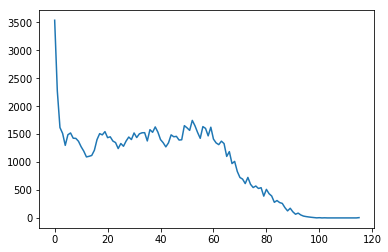

In [31]:
#plot the numbers of people in each age to see the component of appointment by different age

x = list(count_age.keys())
y = list(count_age.values())

plt.plot(x,y)
plt.show()

In [32]:
raw_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


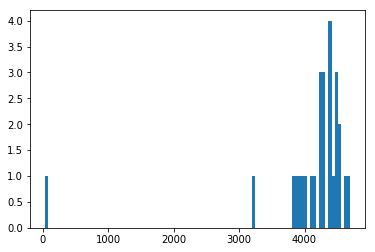

In [33]:
x = raw_data['AppointmentDay'].value_counts()
plt.hist(x,bins=100)
plt.show()

In [34]:
#make a new column that shows whether a patient has pre_existing conditions

raw_data['pre_exi_con']= raw_data['Hipertension'] + raw_data['Diabetes'] + raw_data['Alcoholism'] + raw_data['Handcap']

In [35]:
#count numbers of patient with and without pre existing conditions seperately

no_pec = raw_data['pre_exi_con'].value_counts()
count_no_pec = no_pec[0]
count_pec = sum (no_pec[1:])

In [36]:
#count numbers of people of No-show in each group
no_pec_no_show  = np.count_nonzero(np.logical_and(raw_data['pre_exi_con']== 0 ,raw_data['No-show']== 'Yes'))
pec_no_show = np.count_nonzero(np.logical_and(raw_data['pre_exi_con'] !=0 ,raw_data['No-show']== 'Yes'))

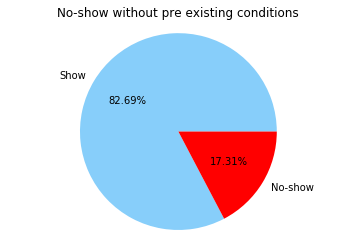

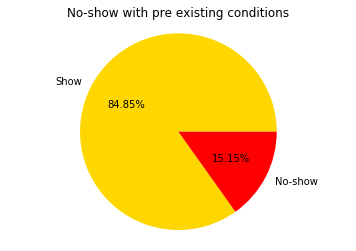

In [37]:
#use pie chart to show the portion of No-show case within different group (group with and without pre existing conditions)

plt.pie([count_no_pec,no_pec_no_show],labels = ['Show','No-show'],colors=['lightskyblue','red'],autopct='%1.2f%%')
plt.axis('equal')
plt.title('No-show without pre existing conditions')
plt.show()

plt.pie([count_pec,pec_no_show],labels = ['Show','No-show'],colors=['gold','red'],autopct='%1.2f%%')
plt.title('No-show with pre existing conditions')
plt.axis('equal')
plt.show()

#now we got two pie chart showing the portion of No-show case under two different conditions,